# Ekstra

Her er litt diverse kuriosa og flere lydfenomener.

In [1]:
# Evaluer først denne

from startscript import *

%matplotlib inline

# Kombinasjonstoner

Nå skal vi prøve å se hva som skjer dersom vi spiller av to sinustoner som har nesten helt lik frekvens.

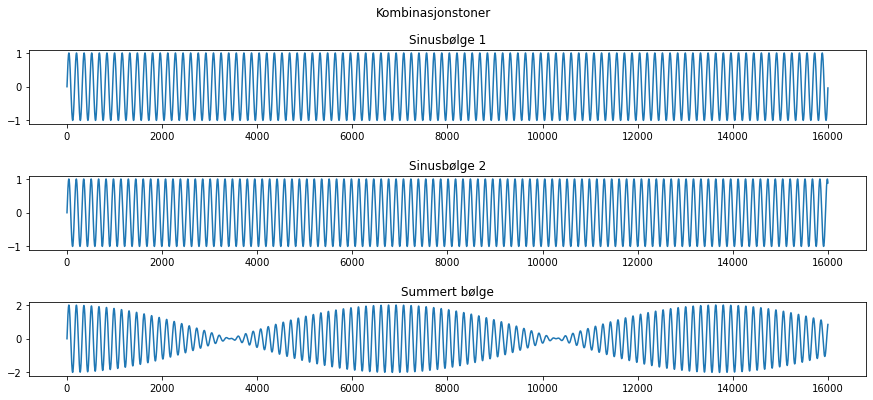

In [53]:
v = 10.  # Varighet

tone1 = sinus_generator(300.0, v)
tone2 = sinus_generator(307.0, v)
lydsignal = tone1 + tone2

spill_av(lydsignal)



# ----------------------------------------
# Kode for å plotte grafene (ikke nødvendig å forstå denne)
start = 0
slutt = 16000

fig, axs = subplots(3)

fig.suptitle("Kombinasjonstoner")
fig.set_figwidth(15)
fig.set_figheight(6)
subplots_adjust(hspace=0.7)

x1 = arange(start, slutt)
x2 = arange(start, slutt)
x3 = arange(start, slutt)

axs[0].set_title("Sinusbølge 1")
axs[1].set_title("Sinusbølge 2")
axs[2].set_title("Summert bølge")
axs[0].plot(x1, tone1[start:slutt])
axs[1].plot(x2, tone2[start:slutt])
axs[2].plot(x3, lydsignal[start:slutt])

show()

Hører du en skurrelyd, at lydnivået svinger opp og ned veldig fort? I musikk kaller man en slik regelmessig veksling mellom stillhet og lyd for _tremolo_ (italiensk for _å skjelve). Her oppstår tremoloen fordi de to sinusbølgene har nesten helt lik frekvens. Da vil de med jevne mellomrom utlikne hverandre slik at det summerte lydsignalet beveger seg mellom stillhet og lyd. Hvor ofte denne bevegelsen skjer, fra ingen lyd til full lyd, er bestemt av differansen mellom frekvensene. I eksempelet over er differansen $307-300 = 7$, altså har tremoloen en frekvens på 7Hz. Denne svingningen i lydstyrke kan man også på grafen for den summerte sinusbølgen.

Forsøk med andre frekvenser og andre differanser. Er tremoloen lik for frekvensene $687$ og $680$? Hvordan høres det ut når du bruker differanser fra 15 og over? Og hvordan høres det ut når differansen er mindre enn 1? Det er mulig du må øke varigheten en del for å høre svingningen når differansen blir veldig liten.

In [61]:
# -- Test her. Juster verdiene og evaluer cellen mellom hver gang --
v = 6.  # Juster varighet hvis nødvendig

frekvens = 300.   # Prøv ulike frekvenser
differanse = 7.  # og ulike differanser
lydsignal = sinus_generator(frekvens, v) + sinus_generator(frekvens + differanse, v)  

spill_av(lydsignal)

## Faseutligning

Hva skjer så hvis vi har to signaler som er nøyaktig invers av hverandre? Evaluer cellen under og se på grafen. Det kan komme en feilmelding «RuntimeWarning», den kan du ignorere.

In [ ]:
v = 6.  # Varighet

tone1 = sinus_generator(300.0, v)
tone2 = - tone1   # Det inverse signalet (alle verdier i signalet endrer fortegn)
lydsignal = tone1 + tone2  # Hver verdi i signalet legges sammen med den inverterte verdien av seg selv

spill_av(lydsignal)



# ----------------------------------------
# Kode for å plotte grafene (ikke nødvendig å forstå denne)
start = 0
slutt = 1000
fig, axs = subplots(3)

fig.suptitle("Differansetoner")
fig.set_figwidth(15)
fig.set_figheight(6)
subplots_adjust(hspace=0.7)

x1 = arange(start, slutt)
x2 = arange(start, slutt)
x3 = arange(start, slutt)

axs[0].set_title("Sinusbølge")
axs[1].set_title("Invertert sinusbølge")
axs[2].set_title("Summert")
axs[0].plot(x1, tone1[start:slutt])
axs[1].plot(x2, tone2[start:slutt])
axs[2].plot(x3, lydsignal[start:slutt])

show()

Her kommer det ingen lyd! Inverse signaler utlikner nemlig hverandre, summen av dem er lik 0. Feilmeldingen kommer fordi spill_av-funksjonen forventer at lydsignalet ikke bare skal inneholde 0-er.

# Retro musikk

Gamle spillenheter og konsoller, som GameBoy, kunne ikke gjøre veldig finoppløselig lyd. Det har gitt den særpregede klangen man ofte forbinder med gamle spill. Vi kan forsøke å etterligne det her ved å redusere oppløsningen på signalet. Ta en kikk på grafene under:

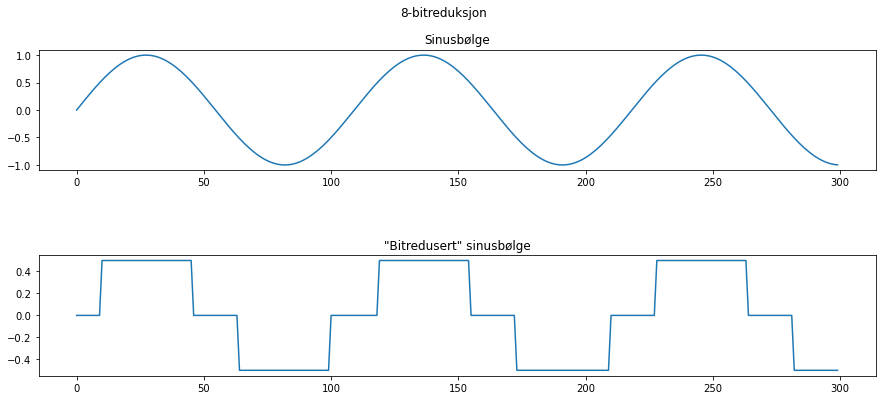

In [55]:
signal = sinus_generator(440, varighet=1)

n = 1   # Test med forskjellige n og se hvordan det påvirker signalet

bitredusert_signal = array([int(sample * (2**n)) / (2**n) for sample in signal])

spill_av(bitredusert_signal)



# ----------------------------------------
# Kode for å plotte grafene:
antall_samples = 300
fig, axs = subplots(2)
fig.suptitle("8-bitreduksjon")
fig.set_figwidth(15)
fig.set_figheight(6)
subplots_adjust(hspace=0.7)

x1 = arange(0, antall_samples)
x2 = arange(0, antall_samples)

axs[0].set_title("Sinusbølge")
axs[1].set_title("\"Bitredusert\" sinusbølge")
axs[0].plot(x1, signal[0:antall_samples])
axs[1].plot(x2, bitredusert_signal[0:antall_samples])

show()

For enkelhetsskyld definerer vi en funksjon som gjør «bitcrushingen», eller bitreduksjonen for oss, så slipper vi å tenke på all tallknusingen bak.

In [56]:
def bitcrusher(signal, n):
    return array([int(sample * (2**n)) / (2**n) for sample in signal])

In [57]:
# SuperMario-melodien

melodi = lag_melodi([
    sinus_generator(659, 0.2),
    pause_generator(0.05),
    sinus_generator(659, 0.2),
    pause_generator(0.3),
    sinus_generator(659, 0.2),
    pause_generator(0.05),
    
    pause_generator(0.25),
    sinus_generator(523, 0.25),
    sinus_generator(660, 0.25),
    pause_generator(0.25),
    
    sinus_generator(783, 0.25),
    pause_generator(0.75),
    
    sinus_generator(391, 0.25),
    pause_generator(0.75),
])

tromme = lag_melodi([
    hvit_støy_generator(0.25, 0.2),
    pause_generator(0.25),
    hvit_støy_generator(0.25, 0.2),
    hvit_støy_generator(0.25, 0.2),
    
    pause_generator(0.25),
    hvit_støy_generator(0.25, 0.2),
    hvit_støy_generator(0.25, 0.2),
    pause_generator(0.25),
    
    hvit_støy_generator(0.25, 0.2),
    pause_generator(0.75),
    
    hvit_støy_generator(0.25, 0.2),
    pause_generator(0.75)
])
sang = melodi + tromme  # Kombinere lydsignalene

retro_sang = bitcrusher(sang, 1) # 'Bitreduser' dem

spill_av(retro_sang)

# Forvrengt lydbølge

Lydsignaler beveger seg normalt sett mellom 1 og -1, altså vil høyttalermembranen som produserer lyden bevege seg fra hvileposisjon (0) og deretter periodisk i mellom ytterkantene 1 og -1. Presser man høyttaleren lenger enn dette kan det lage en forvrengt skurrelyd. På engelsk er dette kjent som _overdrive_. Det er viktig å være litt forsiktig med dette siden man i verste fall risikerer å ødelegge høyttaleren om den presses for langt. Heldigivis passer Audio-objektet, som spiller av lydene i denne Notebooken, på at verdiene som spilles av ikke går utenfor dette intervallet (ved hjelp av noe som heter _normalisering_).

Men vi kan lage en simulert forvrengingseffekt. Det gjør vi ved å _klippe_ alle verdiene som går utenfor intervallet $[-1,1]$. Det er lettere å se hvordan klipping fungerer ved å se hvordan lydbølgen ser ut. Ta en kikk på grafen under: den grå stiplede linjen er den originale sinusbølgen (som går utenfor intervallet $[-1 ,1]$) og det forvrengte signalet (blått) er den samme sinusbølgen, bare klippet ved ytterkantene.

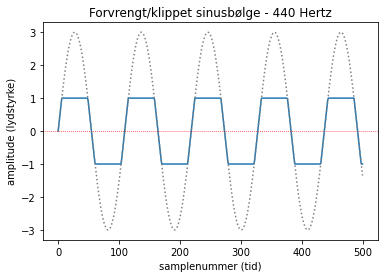

In [58]:
# Forvrengt sinusbølge
frekvens = 440
varighet = 2
t = linspace(0.0, varighet, int(varighet * rate))
sinusbølge = sin(frekvens * 2. * pi * t) * 3.0  # Multipliserer med 3.0, slik at signalet går utenfor rekkevidden [-1,1]
forvrengt_bølge = clip(sinusbølge, -1, 1)       # og klipper det deretter ved 1 og -1

spill_av(forvrengt_bølge)



# --------------------------------------------------------------------------------------------------------------
# Kode for å plotte grafen:
x = arange(0, 500)  # Viser de 500 første målepunktene
title("Forvrengt/klippet sinusbølge - 440 Hertz")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
plot(x, forvrengt_bølge[0:500])
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
plot(x, sinusbølge[0:500], color='gray', linestyle=":")  # Viser gråstiplet original sinusbølge bak den klippede
show()

# Rød eller Brownsk støy: Virrevandring

In [1]:
# [Kommer]

# Musikktips

### Programmerende musiker

**Laurie Spiegel** er en amerikansk kunstner, musiker og programmerer. Hun bidro med musikk til gullplaten som ble sendt ut med romsonden Voyager 1. Stykket hennes baserte seg på Keplers verk *Harmonices Mundi* fra 1619 hvor Kepler skriver om harmonikk i fysiske fenomener og gir en beskrivelse av planetenes elliptiske baner rundt solen. Spiegel er også programmerer og har blant annet skrevet programmet Music Mouse.

Hør Keplers *Harmony of the Worlds/Harmonices Mundi* av Laurie Spiegel: https://youtu.be/ErT83n_YdGs

### Tidlig digital lyd

**Max Mathews og Newman Guttman - The Silver Scale**

Et av de tidligste eksemplene på datamusikk er fra 1957 (!). Max Mathews** fikk Newman Guttman til å lage en kjempeenkel komposisjon på datamaskinen de hadde tilgang til i Bell Laboratories, et viktig forskningslaboratorium i USA. De hadde kun svært enkle virkemidler til rådighet: maskinen kunne produsere en trekantbølge og de kunne ikke styre noe mer enn tonehøyde, varighet og lydstyrke (ikke ulikt bølge-generatorene våre i denne Notebooken). Max Mathews utviklet i denne forbindelsen *Music-N*-programvaren som ble viktig for senere lydprogrammer.

Hør *The Silver Scale* på Youtube: https://youtu.be/PM64-lqYyZ8

Les mer om Max Mathews og tidlig datamusikk: https://5mag.net/features/max-mathews-inventor-digital-music/

### Komponerende datamaskin

**Lejaren Hiller og Leonard Isaacson - Illiac Suite**

Stykket *Illiac Suite* fra 1957 er en av de første komposisjonene laget av en datamaskin. Komponistene Lejaren Hiller og Leonard Isaacson ga datamaskinen ILLIAC 1 et sett med regler som den deretter laget musikalske noter ut i fra. Suiten består av fire eksperimenter hvor forskjellige konsepter testes. Det fjerde og siste eksperimentet er basert på tilfeldighet. Her brukte Hiller og Isaacson noe som heter Markov-kjeder for å "styre" tilfeldigheten og påvirke hvilke intervaller som hadde størst sannsynlighet for å bli valgt av datamaskinen.

Hør 4. sats av Illiac Suite her: https://youtu.be/fojKZ1ymZlo?t=995

Les mer om *Illiac Suite* her: https://en.wikipedia.org/wiki/Illiac_Suite

### Kunstig intelligens og musikk

**David Cope**

En som har jobbet med kunstig intelligens og musikk David Cope. På 80-tallet laget han et program kalt *Emmy* som kan generere stykker i andre komponisters stil. Hør for eksempel denne koralen i stil etter Bach: https://youtu.be/PczDLl92vlc

Les mer om David Cope her: https://en.wikipedia.org/wiki/David_Cope

### Digitale instrumenter

**Holly Herndon**

Den amerikanske komponisten og musikeren Holly Herndon bruker flere egenprogrammerte instrumenter i musikken sin. Hun bruker noe som heter *Max/MSP* for å lage de digitale instrumentene.

Hør sangen *Interference* her: https://youtu.be/ybzSWlpgJOA

Les mer om Holly Herndon her: https://en.wikipedia.org/wiki/Holly_Herndon

### Livekoding

**Sonic Pi og SuperCollider**

De siste årene har det blitt populært å holde konserter hvor man koder musikken live foran publikum. I tillegg til at publikum hører musikken viser man gjerne koden på storskjerm. *Sonic Pi* og *SuperCollider* er to programvarer som ofte brukes til dette. Ofte *improviserer* man kodingen, altså at man ikke planlegger på forhånd hva man skal spille men finner det på underveis.

Sjekk ut live-kodet musikk i Sonic Pi: https://www.youtube.com/watch?v=QOY5VKTYpjA

Og live-kodet musikk i SuperCollider: https://youtu.be/P9QaPtrPJbs?t=126

Andre populære programvarer for å kode musikk er blant annet *Max/MSP*, *PureData* og *Csound*.

### Tilfeldighet og stokastisk musikk
**Iannis Xenakis - Pithoprakta**

Den gresk-franske komponisten Iannis Xenakis hadde ingeniør- og musikkbakgrunn. Han brukte tilfeldighet i flere av sine musikkstykker, og kalte det for *stokastisk musikk*. I stykket *Pithoprakta* etterligner han gassmolekylers tilfeldige bevegelser i et lukket rom når det utsettes for temperaturendringer. Han brukte datamaskinen mye for å beregninger til komposisjonene sine.

Hør Pithoprakta og se grafisk partitur på Youtube: https://youtu.be/nvH2KYYJg-o

Mer om Pithoprakta på Wikipedia (engelsk): https://en.wikipedia.org/wiki/Pithoprakta


### Støy
**Lasse Marhaug - Sleeper**

Støymusikk er en egen sjanger og musikeren Lasse Marhaug er en som har jobbet mye med det. I hans musikk får man virkelig et innblikk i alle de forskjellige formene for støy som fins og hvor stor variasjon det er i hvordan støy høres ut. Støy er ikke bare støy!

Hør Sleeper på Youtube: https://youtu.be/YuAKeRV96XE

Mer om støymusikk på Wikipedia (engelsk): https://en.wikipedia.org/wiki/Noise_music

### Overtoner
**Gérard Grisey - Les espaces acoustiques: III. Partiels**

Komponisten Gérard Grisey skrev et helt stykke basert på overtonene i en trombone. Han analyserte overtonene og spekteret i en trombone-tone, "strakk det ut" i tid og skrev det som notert musikk for et ensemble på 18 musikere.

Hør Partiels på Youtube: https://youtu.be/Sb0pcZ53uD4

Mer om Partiels på Wikipedia (engelsk): https://en.wikipedia.org/wiki/Partiels